In [10]:
from pathlib import Path

DATASET_PATH = Path.home() / "dataset" / "gtzan"
print(f"Dataset will be stored at: {DATASET_PATH}")

Dataset will be stored at: C:\Users\razva\dataset\gtzan


Downloading the dataset if not downloaded already or skipping if downloaded.

In [11]:
import kaggle

if not DATASET_PATH.exists() or not list(DATASET_PATH.iterdir()):
    print("Dataset not found. Downloading from Kaggle...")
    
    DATASET_PATH.mkdir(parents=True, exist_ok=True)

    kaggle.api.dataset_download_files(
        'andradaolteanu/gtzan-dataset-music-genre-classification',
        path=DATASET_PATH,
        unzip=True
    )

    print("\nDownload complete!\n")
else:
    print("Dataset already exists. Skipping download.")

Dataset already exists. Skipping download.


Visualizing the contents of the Data/ folder where the dataset was downloaded.

In [12]:
data_folder = DATASET_PATH / "Data"

if data_folder.exists():
    print("Contents of Data/ folder:")
    print("-" * 50)
    
    for item in data_folder.iterdir():
        if item.is_dir():
            print(f"📁 {item.name}/")
        else:
            print(f"📄 {item.name}")
else:
    print("Data folder doesn't exist!")

Contents of Data/ folder:
--------------------------------------------------
📄 features_30_sec.csv
📄 features_3_sec.csv
📁 genres_original/
📁 images_original/


Checking the shape of the features.

In [13]:
import pandas as pd

csv_path = DATASET_PATH / "Data" / "features_30_sec.csv"

print("Loading dataset...")
df = pd.read_csv(csv_path)

print(f"✓ Dataset loaded!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Loading dataset...
✓ Dataset loaded!
Shape: 1000 rows, 60 columns


Visualizing the first 5 rows of the dataset.

In [14]:
print("First 5 rows of the dataset:")
print("=" * 80)
df.head()

First 5 rows of the dataset:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Checking the genres we have.

In [15]:
print("Genres in the dataset:")
print("=" * 50)
print(df['label'].value_counts().sort_index())
print()
print(f"Total unique genres: {df['label'].nunique()}")

Genres in the dataset:
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Total unique genres: 10


Checking the column names.

In [16]:
print(f"All {len(df.columns)} columns:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

All 60 columns:
 1. filename
 2. length
 3. chroma_stft_mean
 4. chroma_stft_var
 5. rms_mean
 6. rms_var
 7. spectral_centroid_mean
 8. spectral_centroid_var
 9. spectral_bandwidth_mean
10. spectral_bandwidth_var
11. rolloff_mean
12. rolloff_var
13. zero_crossing_rate_mean
14. zero_crossing_rate_var
15. harmony_mean
16. harmony_var
17. perceptr_mean
18. perceptr_var
19. tempo
20. mfcc1_mean
21. mfcc1_var
22. mfcc2_mean
23. mfcc2_var
24. mfcc3_mean
25. mfcc3_var
26. mfcc4_mean
27. mfcc4_var
28. mfcc5_mean
29. mfcc5_var
30. mfcc6_mean
31. mfcc6_var
32. mfcc7_mean
33. mfcc7_var
34. mfcc8_mean
35. mfcc8_var
36. mfcc9_mean
37. mfcc9_var
38. mfcc10_mean
39. mfcc10_var
40. mfcc11_mean
41. mfcc11_var
42. mfcc12_mean
43. mfcc12_var
44. mfcc13_mean
45. mfcc13_var
46. mfcc14_mean
47. mfcc14_var
48. mfcc15_mean
49. mfcc15_var
50. mfcc16_mean
51. mfcc16_var
52. mfcc17_mean
53. mfcc17_var
54. mfcc18_mean
55. mfcc18_var
56. mfcc19_mean
57. mfcc19_var
58. mfcc20_mean
59. mfcc20_var
60. label


# DATA ANALYSIS SECTION

Preparing the data for analysis.

In [17]:
feature_columns = [col for col in df.columns if col not in ['filename', 'length', 'label']]

X = df[feature_columns]
y = df['label']

print(f"Features (X): {X.shape}")
print(f"Labels (y): {y.shape}")
print(f"\nTotal features for analysis: {len(feature_columns)}")

Features (X): (1000, 57)
Labels (y): (1000,)

Total features for analysis: 57


# BASIC STATISTICS
Calculate mean, median, standard deviation, min, max, variance, skewness and kurtosis for all features.

Results are saved to a CSS file named "basic_statistics.csv".

In [18]:
# Calculate basic statistics
stats_df = X.describe().T  # Transpose for better readability

# Add additional statistics
stats_df['variance'] = X.var()
stats_df['skewness'] = X.skew()
stats_df['kurtosis'] = X.kurtosis()

print("Basic Statistics Summary:")
print("=" * 80)
print(stats_df.head(10))

# Save to CSV
stats_df.to_csv('basic_statistics.csv')
print("\nStatistics saved to 'basic_statistics.csv'")

Basic Statistics Summary:
                          count          mean           std           min  \
chroma_stft_mean         1000.0  3.786817e-01  8.170489e-02      0.171939   
chroma_stft_var          1000.0  8.633982e-02  7.735298e-03      0.044555   
rms_mean                 1000.0  1.309297e-01  6.568311e-02      0.005276   
rms_var                  1000.0  3.051399e-03  3.634500e-03      0.000004   
spectral_centroid_mean   1000.0  2.201781e+03  7.159606e+02    570.040355   
spectral_centroid_var    1000.0  4.696916e+05  4.008995e+05   7911.251394   
spectral_bandwidth_mean  1000.0  2.242541e+03  5.263165e+02    898.066208   
spectral_bandwidth_var   1000.0  1.370792e+05  9.645567e+04  10787.185064   
rolloff_mean             1000.0  4.571549e+03  1.574792e+03    749.140636   
rolloff_var              1000.0  1.844345e+06  1.425085e+06  14686.118554   

                                   25%           50%           75%  \
chroma_stft_mean              0.319562  3.831479e-01  4.

Visualizing top features by variance.

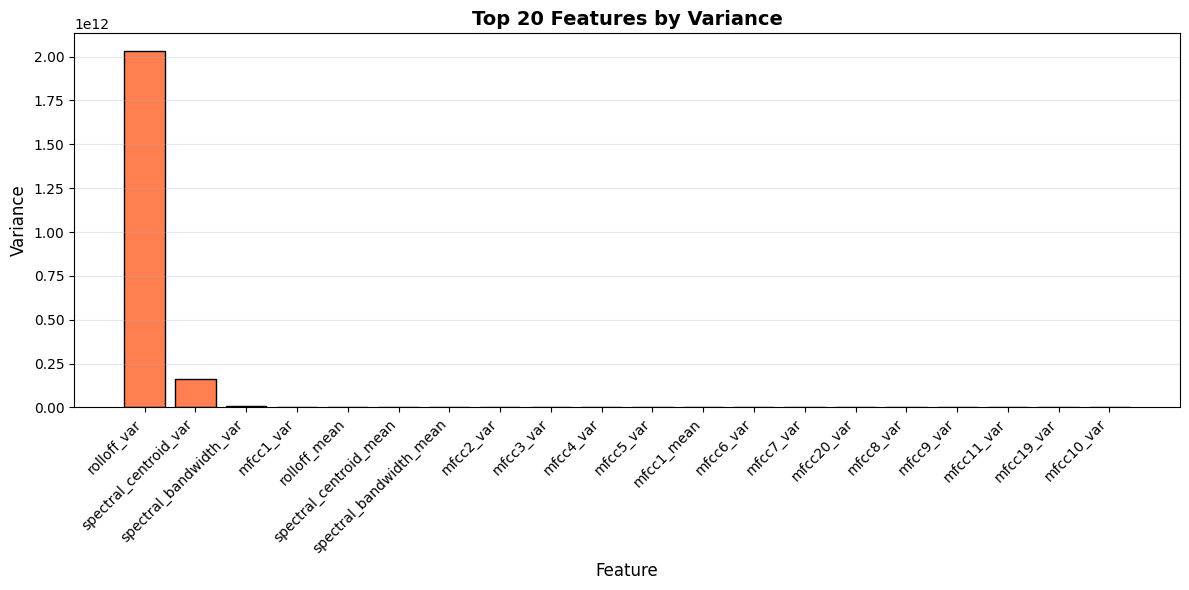

Feature variance plot saved to 'feature_variance.png'


In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

top_var = stats_df['variance'].sort_values(ascending=False).head(20)

plt.bar(range(len(top_var)), top_var.values, color='coral', edgecolor='black')
plt.xticks(range(len(top_var)), top_var.index, rotation=45, ha='right')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Top 20 Features by Variance', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_variance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature variance plot saved to 'feature_variance.png'")

Showing distribution of skewness values.

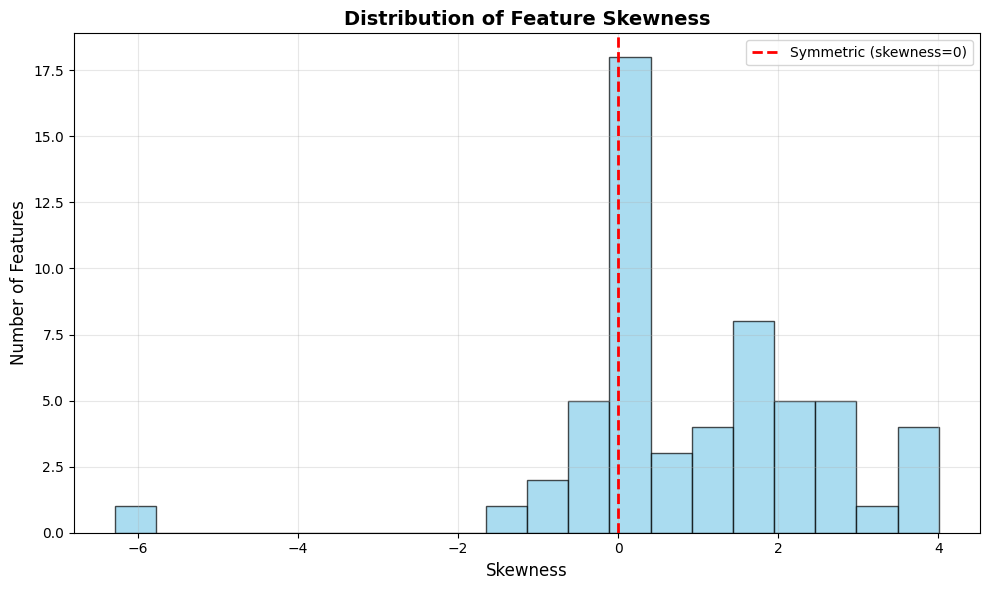

Skewness distribution saved to 'skewness_distribution.png'


In [25]:
plt.figure(figsize=(10, 6))

plt.hist(stats_df['skewness'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Symmetric (skewness=0)')
plt.xlabel('Skewness', fontsize=12)
plt.ylabel('Number of Features', fontsize=12)
plt.title('Distribution of Feature Skewness', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('skewness_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Skewness distribution saved to 'skewness_distribution.png'")

# CORRELATION ANALYSIS
Analyze how features are related to each other. High correlation (>0.8 or <-0.8) indicates redundancy.

Results are saved to a CSS file named "correlation_matrix.csv".

In [26]:
# Calculate correlation matrix
corr_matrix = X.corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")
print("\nSample correlations (first 5x5):")
print(corr_matrix.iloc[:5, :5])

# Find highly correlated pairs
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_value
            })

print(f"\nFound {len(high_corr_pairs)} highly correlated pairs (|r| > 0.8)")

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df.to_csv('high_correlations.csv', index=False)
    print(f"{len(high_corr_pairs)} highly correlated pairs saved to 'high_correlations.csv'")

# Save correlation matrix
corr_matrix.to_csv('correlation_matrix.csv')
print("Correlation matrix saved to 'correlation_matrix.csv'")

Correlation matrix shape: (57, 57)

Sample correlations (first 5x5):
                        chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
chroma_stft_mean                1.000000        -0.461729  0.499926  0.261544   
chroma_stft_var                -0.461729         1.000000 -0.078777  0.290138   
rms_mean                        0.499926        -0.078777  1.000000  0.607399   
rms_var                         0.261544         0.290138  0.607399  1.000000   
spectral_centroid_mean          0.615728        -0.246441  0.510154  0.347831   

                        spectral_centroid_mean  
chroma_stft_mean                      0.615728  
chroma_stft_var                      -0.246441  
rms_mean                              0.510154  
rms_var                               0.347831  
spectral_centroid_mean                1.000000  

Found 22 highly correlated pairs (|r| > 0.8)
22 highly correlated pairs saved to 'high_correlations.csv'
Correlation matrix saved to 'correlation_mat

Visualizing the correlation heatmap, since 22 pairs is significant, meaning there's some feature redundancy.

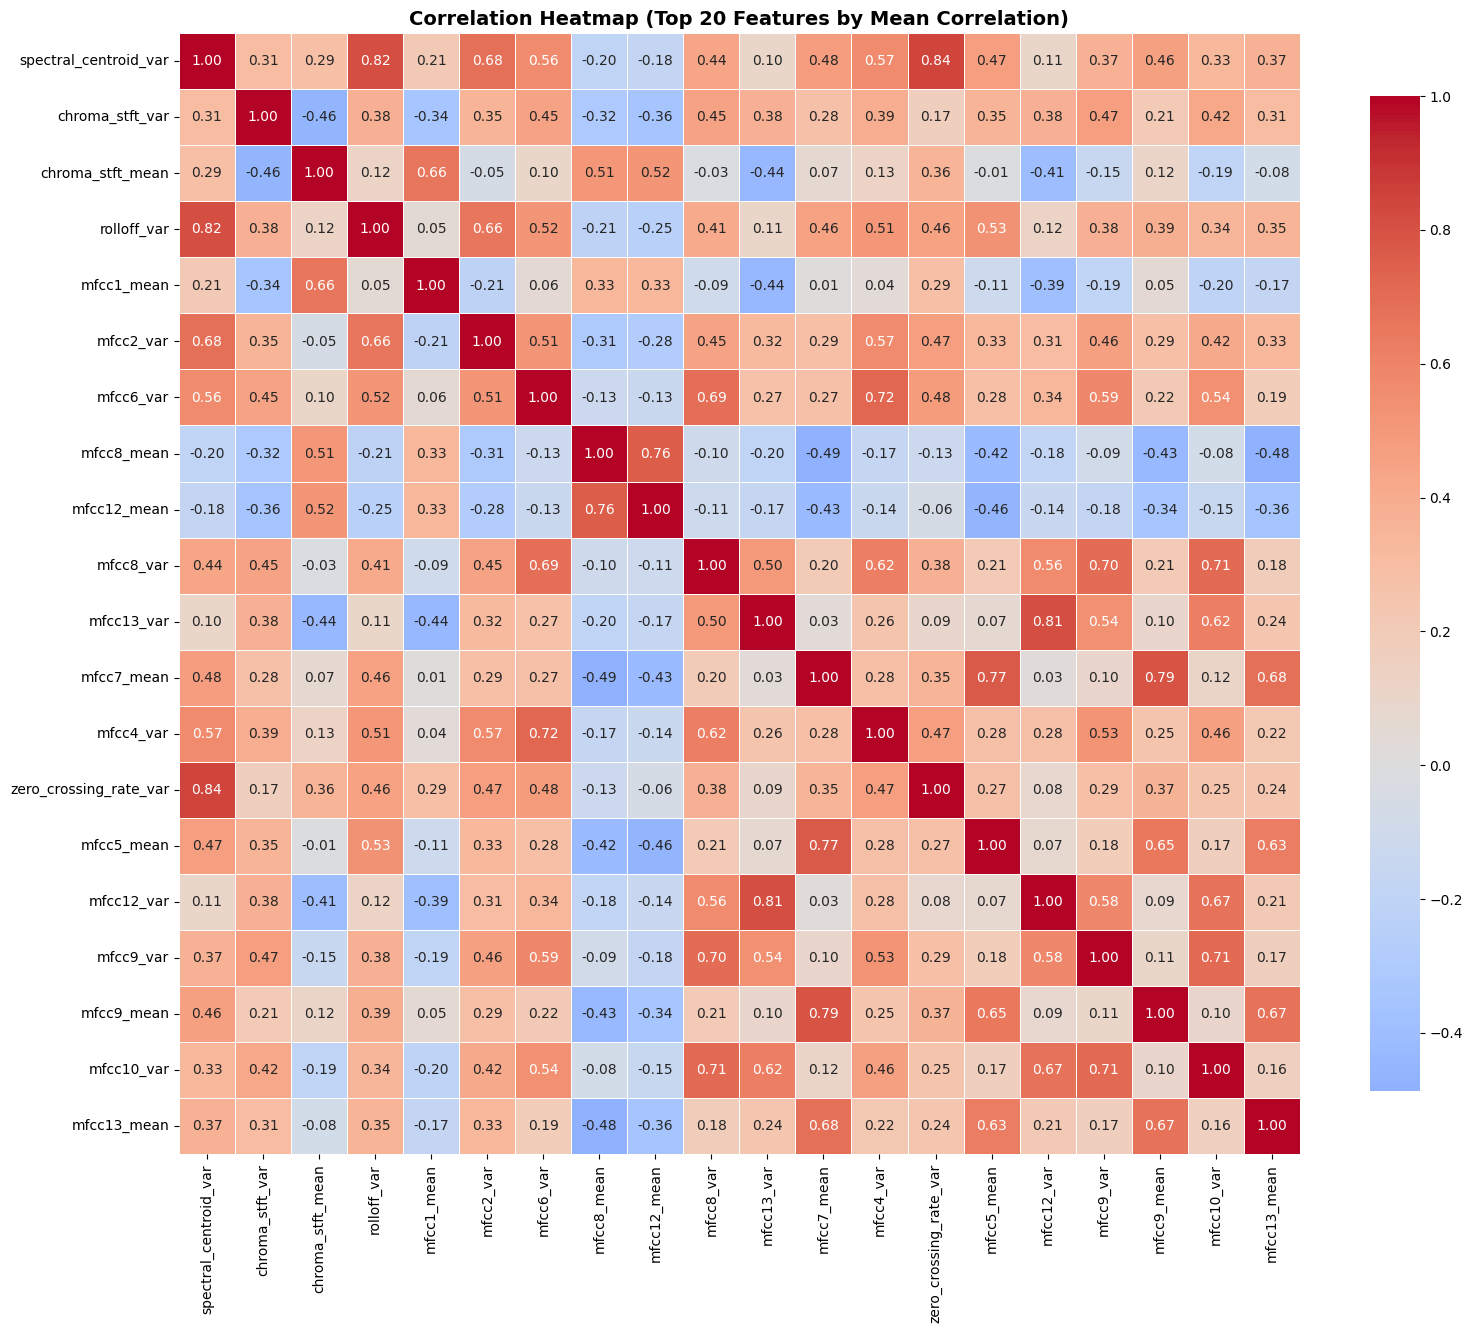

✓ Correlation heatmap saved to 'correlation_heatmap.png'


In [20]:
import seaborn as sns

# Create correlation heatmap
plt.figure(figsize=(16, 14))

# Since we have 57 features, show top 20 by mean correlation
mean_corr = corr_matrix.abs().mean().sort_values(ascending=False)
top_features = mean_corr.head(20).index
corr_subset = corr_matrix.loc[top_features, top_features]

sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap (Top 20 Features by Mean Correlation)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation heatmap saved to 'correlation_heatmap.png'")

# FEATURE INDEPENDENCE
Test if features provide unique information. Features with |correlation| > 0.7 are considered dependent.

In [21]:
# Count dependent vs independent feature pairs
dependent_pairs = 0
total_pairs = len(corr_matrix.columns) * (len(corr_matrix.columns) - 1) // 2

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            dependent_pairs += 1

independent_pairs = total_pairs - dependent_pairs
independence_ratio = (independent_pairs / total_pairs) * 100

print("Feature Independence Analysis:")
print("=" * 50)
print(f"Total feature pairs: {total_pairs}")
print(f"Dependent pairs (|r| > 0.7): {dependent_pairs}")
print(f"Independent pairs: {independent_pairs}")
print(f"Independence ratio: {independence_ratio:.2f}%")

# Save report
with open('independence_report.txt', 'w') as f:
    f.write(f"Total pairs: {total_pairs}\n")
    f.write(f"Dependent pairs: {dependent_pairs}\n")
    f.write(f"Independent pairs: {independent_pairs}\n")
    f.write(f"Independence ratio: {independence_ratio:.2f}%\n")

print("\nIndependence report saved to 'independence_report.txt'")

Feature Independence Analysis:
Total feature pairs: 1596
Dependent pairs (|r| > 0.7): 52
Independent pairs: 1544
Independence ratio: 96.74%

✓ Independence report saved to 'independence_report.txt'


96.74% independence is very good, meaning most features provide unique information, with only ~3% redundancy.

# FEATURE IMPORTANCE
Use Random Forest to rank features by their importance for genre classification.

In [22]:
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest to calculate feature importance...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature importance calculated!")
print("\nTop 10 Most Important Features:")
print("=" * 60)
print(importance_df.head(10).to_string(index=False))

# Save to CSV
importance_df.to_csv('feature_importance.csv', index=False)
print("\nFeature importance saved to 'feature_importance.csv'")

Training Random Forest to calculate feature importance...

Feature importance calculated!

Top 10 Most Important Features:
                Feature  Importance
       chroma_stft_mean    0.049638
           perceptr_var    0.039018
        chroma_stft_var    0.035142
               rms_mean    0.033334
             mfcc4_mean    0.030325
spectral_bandwidth_mean    0.029748
                rms_var    0.028476
              mfcc5_var    0.024636
           rolloff_mean    0.024319
            harmony_var    0.024126

Feature importance saved to 'feature_importance.csv'


Visualizing feature importance (for top 20 features).

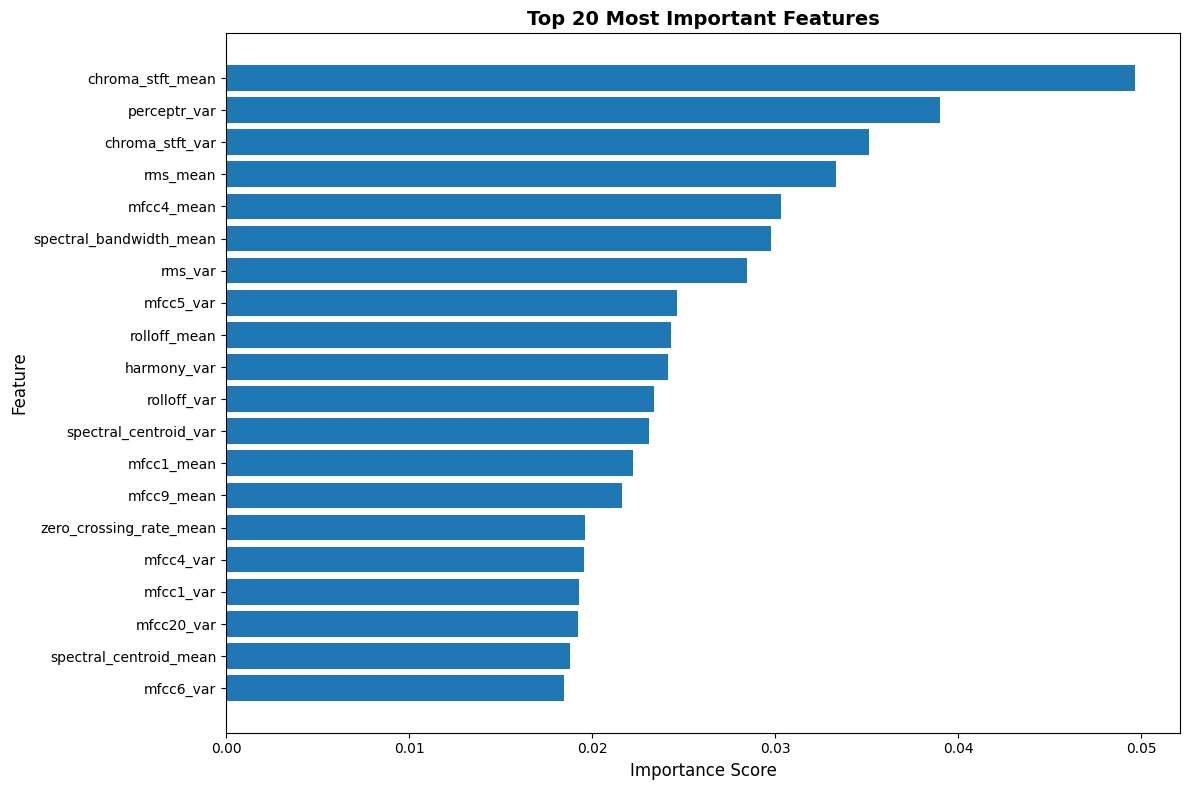

✓ Feature importance plot saved to 'feature_importance.png'


In [23]:
plt.figure(figsize=(12, 8))

top_n = 20
top_features = importance_df.head(top_n)

plt.barh(range(top_n), top_features['Importance'])
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature importance plot saved to 'feature_importance.png'")

# DATA DISTRIBUTION ANALYSIS
# TODO - normality tests, distribution histograms, box plots for outliers.

# DATA VISUALIZATION AND INTERPRETATION
# TODO - PCA, genre distribution bar chart, variance analysis.